In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output

In [9]:
ccdata_df = pd.read_csv('C:/Users/Admin/Desktop/Data Scince Insaid/ML/creditcard.csv')
ccdata_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
ccdata_df.shape

(30000, 25)

In [11]:
ccdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [12]:
ccdata_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
ccdata_df.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
ccdata_df.rename(columns={"default payment next month": "DefaultPayment"}, inplace=True)
ccdata_df = ccdata_df.drop('ID', axis=1)
ccdata_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPayment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


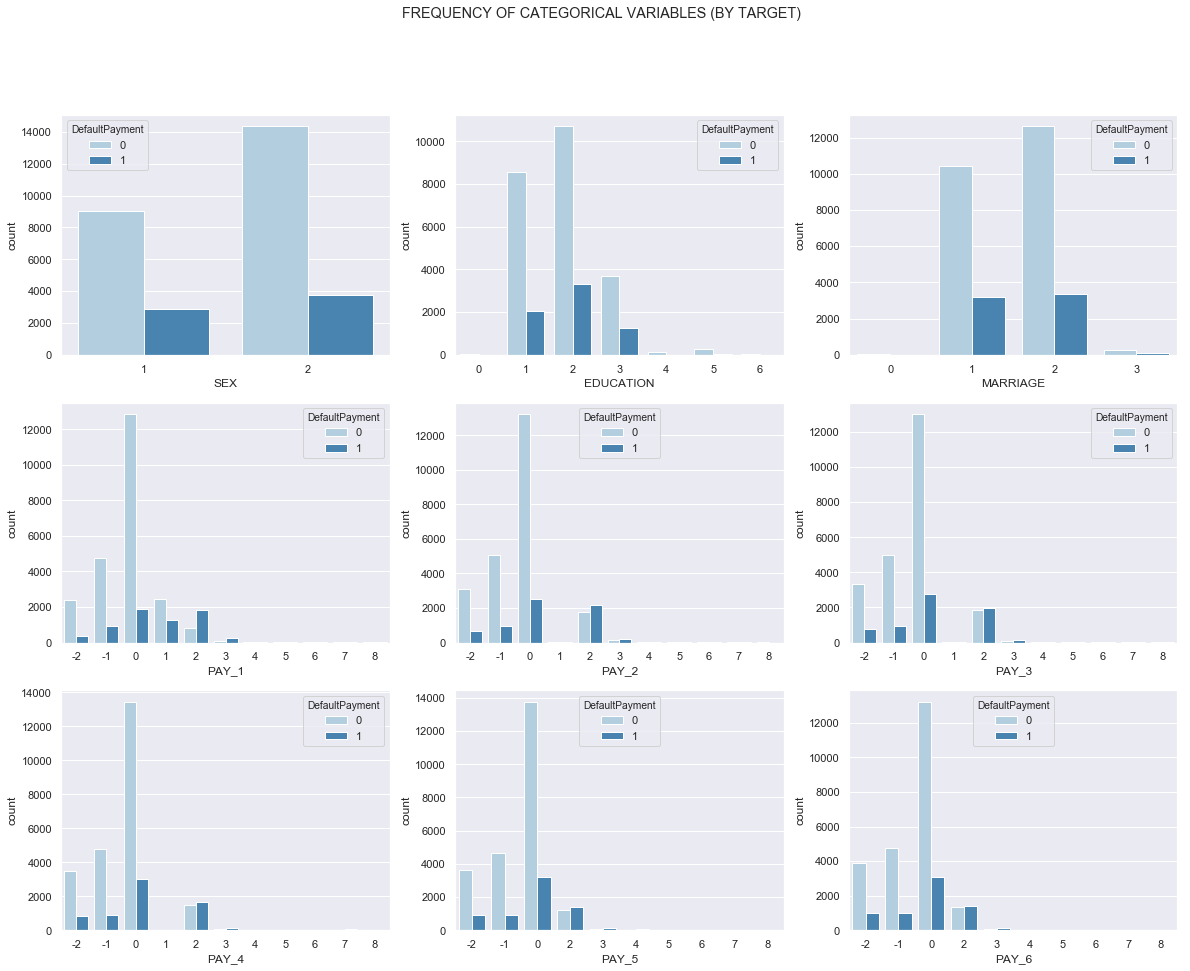

In [14]:
# Creating a new dataframe with categorical variables
subset = ccdata_df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 'DefaultPayment']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="DefaultPayment", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="DefaultPayment", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="DefaultPayment", data=subset, palette="Blues", ax=axes[2,2]);

In [15]:
ccdata_df['grad_school'] = (ccdata_df['EDUCATION'] == 1).astype('int')  #grad_school=1
ccdata_df['university'] = (ccdata_df['EDUCATION'] == 2).astype('int')   #university=2
ccdata_df['high _school'] = (ccdata_df['EDUCATION'] == 3).astype('int') #high _school=3
ccdata_df.drop('EDUCATION',axis =1,inplace=True)                        #dropping EDUCATION
ccdata_df.head(10)

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPayment,grad_school,university,high _school
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,689,0,0,0,0,1,0,1,0
1,120000,2,2,26,-1,2,0,0,0,2,...,0,1000,1000,1000,0,2000,1,0,1,0
2,90000,2,2,34,0,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,1,0
3,50000,2,1,37,0,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,1,0
4,50000,1,1,57,-1,0,-1,0,0,0,...,2000,36681,10000,9000,689,679,0,0,1,0
5,50000,1,2,37,0,0,0,0,0,0,...,2500,1815,657,1000,1000,800,0,1,0,0
6,500000,1,2,29,0,0,0,0,0,0,...,55000,40000,38000,20239,13750,13770,0,1,0,0
7,100000,2,2,23,0,-1,-1,0,0,-1,...,380,601,0,581,1687,1542,0,0,1,0
8,140000,2,1,28,0,0,2,0,0,0,...,3329,0,432,1000,1000,1000,0,0,0,1
9,20000,1,2,35,-2,-2,-2,-2,-1,-1,...,0,0,0,13007,1122,0,0,0,0,1


In [16]:
ccdata_df['MALE'] =(ccdata_df['SEX'] == 1).astype('int')  #Male=1 ,so if male =0 it would be female 
ccdata_df.drop('SEX',axis=1,inplace=True)                  #dropping SEX
ccdata_df.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPayment,grad_school,university,high _school,MALE
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,1,0,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,0,1,0,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,0,1,0,0
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,1,0,1


In [17]:
ccdata_df['married'] =(ccdata_df['MARRIAGE'] == 1).astype('int')  #married=1,if married=0 then is not married
ccdata_df.drop('MARRIAGE',axis=1,inplace=True)                    #dropping MARRIAGE
ccdata_df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPayment,grad_school,university,high _school,MALE,married
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,1,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1


In [18]:
Bill_PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in Bill_PAY :
  ccdata_df.loc[ccdata_df[p]<0,p] = 0     #who to paid on time (-2,-1 and 0).we are replace (-1 and -2) with 0 since(0=0months)
 
ccdata_df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DefaultPayment,grad_school,university,high _school,MALE,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,1,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1


Text(0.5, 1.0, 'Correlation between features')

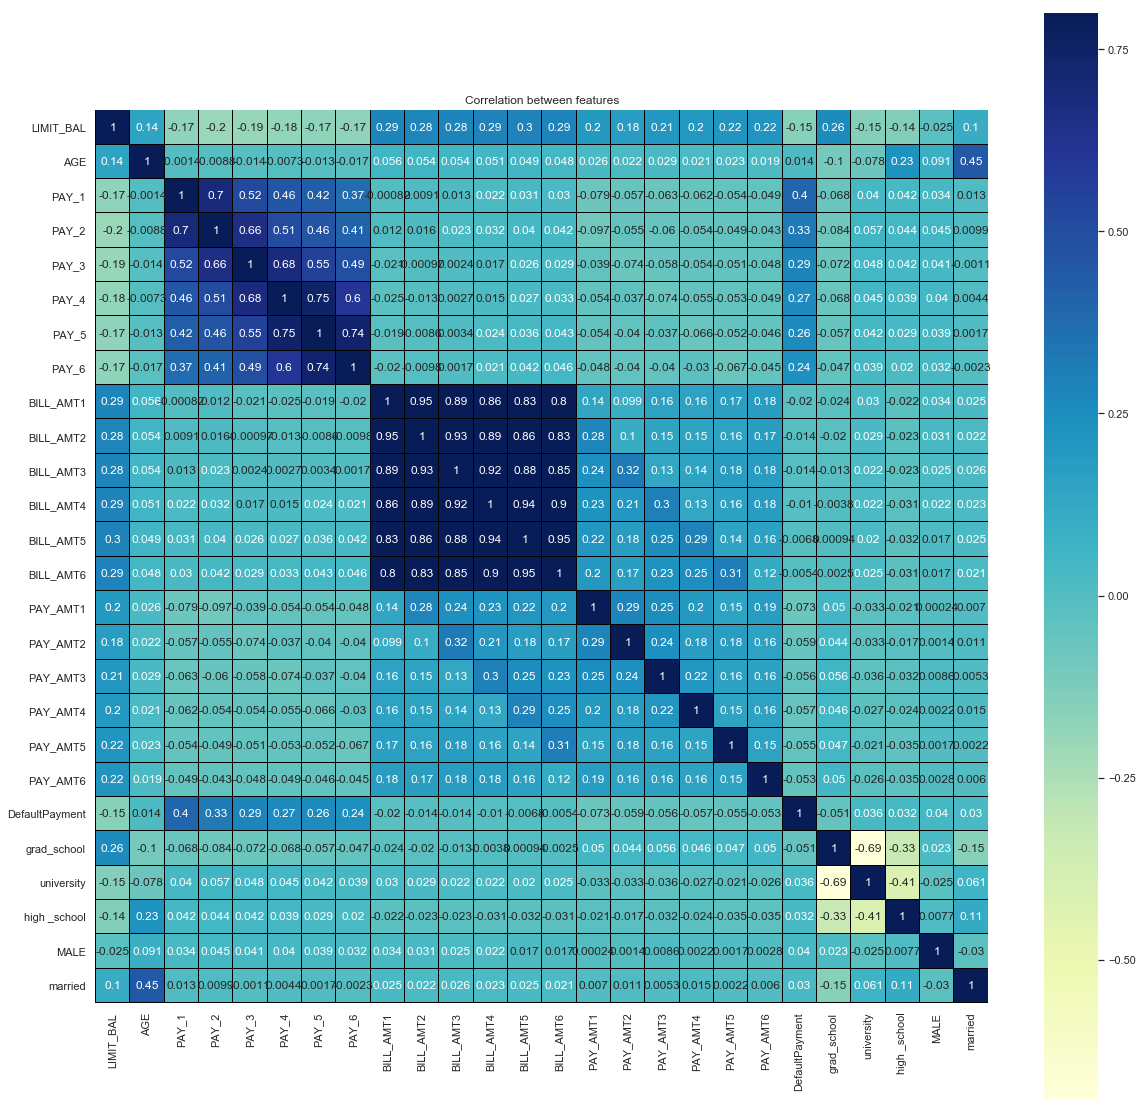

In [20]:
corr = ccdata_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

# Spliting X and Y 

In [21]:
X = ccdata_df.loc[:,ccdata_df.columns != 'DefaultPayment']
X.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,grad_school,university,high _school,MALE,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,689,0,0,0,0,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,1,1


In [22]:
y=ccdata_df.DefaultPayment
y.head()

0    1
1    1
2    0
3    0
4    0
Name: DefaultPayment, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [24]:
print(X_train.shape)
print(y_train.shape)

(24000, 25)
(24000,)


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred_train = logreg.predict(X_train) 

In [27]:
y_pred_test = logreg.predict(X_test) 

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         4663        0
Default             1337        0


In [30]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test))   

Accuracy score for train data is: 0.7791666666666667
Accuracy score for test data is: 0.7771666666666667
Precision score for test data using model1 is: 0.0
Recall score for test data using model1 is: 0.0


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [32]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython 

In [ ]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

In [33]:
y_pred_train = model.predict(X_train)  

In [35]:
y_pred_test = model.predict(X_test)   

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         3783      880
Default              789      548


In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test)) 

Accuracy score for train data is: 0.9993333333333333
Accuracy score for test data is: 0.7218333333333333
Precision score for test data using model1 is: 0.38375350140056025
Recall score for test data using model1 is: 0.4098728496634256


# Decision Tree using GrishSearchCV

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
y_pred_test1 = grid_search.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         4447      216
Default              873      464


In [42]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test)) 

Accuracy score for train data is: 0.9993333333333333
Accuracy score for test data is: 0.7218333333333333
Precision score for test data using model1 is: 0.38375350140056025
Recall score for test data using model1 is: 0.4098728496634256


# Random Forest  with 2models -Ginni as critiria

In [43]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state = 0)

model1.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [44]:
model2 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
y_pred_train = model1.predict(X_train)
y_pred_train1 = model2.predict(X_train)

In [46]:
y_pred_test = model1.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = model2.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         4406      257
Default              924      413


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         4367      296
Default              862      475


In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data using the model1 without parameter specification:', accuracy_score(y_train,y_pred_train))
print('Accuracy score for test data using the model1 without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for train data using the model2 with parameter specification:', accuracy_score(y_train,y_pred_train1))
print('Accuracy score for test data using the model2 with parameter specification:', accuracy_score(y_test,y_pred_test1))

from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test)) 

from sklearn.metrics import precision_score
precision2 = precision_score(y_test,y_pred_test1)
print('Precision score for test data using model2 is:', precision2)
from sklearn.metrics import recall_score
print('Recall score for test data using model2 is:',recall_score(y_test,y_pred_test1))  

Accuracy score for train data using the model1 without parameter specification: 0.97975
Accuracy score for test data using the model1 without parameter specification: 0.8031666666666667
Accuracy score for train data using the model2 with parameter specification: 0.9920416666666667
Accuracy score for test data using the model2 with parameter specification: 0.807
Precision score for test data using model1 is: 0.6164179104477612
Recall score for test data using model1 is: 0.3089005235602094
Precision score for test data using model2 is: 0.6160830090791181
Recall score for test data using model2 is: 0.35527299925205685


# Random forest with RandomizedsearchCV


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [53]:
random_search.fit(X_train, y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': range(2, 5), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001402E898>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001402EB38>, 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [54]:
y_pred_test1 = random_search.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Not_Default','Default']
confusion_matrix.columns = ['Not_Default','Default']
print(confusion_matrix)

             Not_Default  Default
Not_Default         4444      219
Default              870      467


In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test1))
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test1)
print('Precision score for test data using model1 is:', precision1)
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test1))  
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, y_pred_test1))

Accuracy score on test data with RandomizedSearchCV is: 0.8185
Precision score for test data using model1 is: 0.6807580174927114
Recall score for test data using model1 is: 0.3492894540014959
F1_score for test data using model1 is: 0.4616905585763717


# Plotting ROC Curve

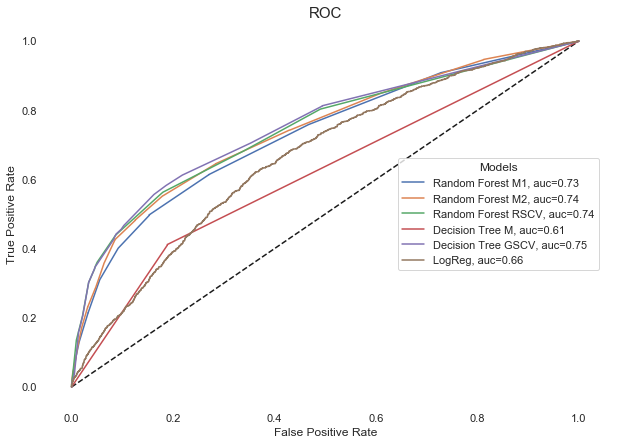

In [57]:
from sklearn import metrics
y_pred_proba_RF = model1.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_RF1 = model2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_RF1)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_RF1)


y_pred_proba_RF2 = random_search.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_RF2)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_RF2)

y_pred_proba_DT = model.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_DT)


y_pred_proba_DT1 = grid_search.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_DT1)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_DT1)


y_pred_proba_LR = logreg .predict_proba(X_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc6 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest M1, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Random Forest M2, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Random Forest RSCV, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Decision Tree M, auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="Decision Tree GSCV, auc="+str(round(auc5,2)))
plt.plot(fpr6,tpr6,label="LogReg, auc="+str(round(auc6,2)))
plt.legend(loc=5, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

Therefore we observe has highest accuracy and